## Starting Off

You are the manager of a SAT Prep course and want to develop marketing materials to show the value of your program. Identify which statistical tests you would use in the following situations. 

1. You want to prove that the people who attend the course score significantly higher than student who don't attend your course.

2. You take attendance every session and can split the students into three groups, 'perfect', 'tardies',  and 'truants'. You believe that students who got a scholarship to the course are more likely to be better attendance than student who paid full price. 

2. You believe that students with better attendance will have a larger increase in their their SAT scores.

# A Simple Introduction to ANOVA  

**Analysis of variance (ANOVA)** is a statistical technique that is used to check if the means of two or more groups are significantly different from each other. ANOVA checks the impact of one or more factors by comparing the means of different samples.

We can use ANOVA to prove/disprove if attendance group has an impact on the increase in SAT scores.

## Terminologies related to ANOVA you need to know


### Grand Mean

There are two kinds of means that we use in ANOVA calculations, which are separate sample means ($\mu_1, \mu_2, \mu_3$) and the grand mean $\mu$  . The grand mean is the mean of sample means or the mean of all observations combined, irrespective of the sample.

### Hypothesis

The Null hypothesis in ANOVA is valid when all the sample means are equal, or they don’t have any significant difference. Thus, they can be considered as a part of a larger set of the population. On the other hand, the alternate hypothesis is valid when at least one of the sample means is different from the rest of the sample means. In mathematical form, they can be represented as:

$H_0: \mu_1 = \mu_2 = \mu_3 ...$

$H_a: \mu_1 \neq \mu_m $

In other words, the null hypothesis states that all the sample means are equal or the factor did not have any significant effect on the results. Whereas, the alternate hypothesis states that at least one of the sample means is different from another.  

We still can’t tell which one specifically. For that, we will use other methods that we will discuss later in this article.

### Between Group Variability

Consider the distributions of the below two samples. As these samples overlap, their individual means won’t differ by a great margin. Hence the difference between their individual means and grand mean won’t be significant enough.

<img src="img/between.png" width="300"/>

As the samples differ from each other by a big margin, their individual means would also differ. The difference between the individual means and grand mean would therefore also be significant.

<img src="img/very_different.png" width="300"/>

Such variability between the distributions called Between-group variability. It refers to variations between the distributions of individual groups (or levels) as the values within each group are different.

<img src="img/comparison_within.png" width="400"/>

We multiply each squared deviation by each sample size and add them up. This is called the **sum-of-squares for between-group variability*.* 

<img src="img/ss_between.png" width="400"/>

For our between-group variability, we will find each squared deviation, weigh them by their sample size, sum them up, and divide by the degrees of freedom, which in the case of between-group variability is the number of sample means (k) minus 1.

<img src="img/ms_between.png" width="400"/>

### Within Group Variability

<img src="img/within_group.png" width="400"/>

Such variations within a sample are denoted by Within-group variation. It refers to variations caused by differences within individual groups (or levels) as not all the values within each group are the same. Each sample is looked at on its own and variability between the individual points in the sample is calculated.


We can measure Within-group variability by looking at how much each value in each sample differs from its respective sample mean. So first, we’ll take the squared deviation of each value from its respective sample mean and add them up. This is the sum of squares for within-group variability.

<img src="img/ss_within.png" width="500"/>


Like between-group variability, we then divide the sum of squared deviations by the degrees of freedom  to find a less-biased estimator for the average squared deviation. 

<img src="img/df_within.png" width="700"/>

<img src="img/ms_within.png" width="400"/>


## F-Statistic

The statistic which measures if the means of different samples are significantly different or not is called the F-Ratio. Lower the F-Ratio, more similar are the sample means.

#### F = Between group variability / Within group variability



<img src="img/betweeN_and_within.png" width="400"/>


This F-statistic calculated here is compared with the F-critical value for making a conclusion. If the value of the calculated F-statistic is more than the F-critical value (for a specific α/significance level), then we reject the null hypothesis and can say that the treatment had a significant effect.

In [1]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
import matplotlib.pyplot as plt

# Loading data
df = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/difficile.csv")
df.drop('person', axis= 1, inplace= True)

# Recoding value from numeric to string
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)
    
# Gettin summary statistics
df['libido'].describe()

count    15.000000
mean      3.466667
std       1.767430
min       1.000000
25%       2.000000
50%       3.000000
75%       4.500000
max       7.000000
Name: libido, dtype: float64

In [2]:
df['libido'].groupby(df['dose']).describe()


,count,mean,std,min,25%,50%,75%,max
dose,,,,,,,,
high,5.0,5.0,1.581139,3.0,4.0,5.0,6.0,7.0
low,5.0,3.2,1.303840,2.0,2.0,3.0,4.0,5.0
placebo,5.0,2.2,1.303840,1.0,1.0,2.0,3.0,4.0


In [3]:
stats.f_oneway(df['libido'][df['dose'] == 'high'], 
             df['libido'][df['dose'] == 'low'],
             df['libido'][df['dose'] == 'placebo'])

F_onewayResult(statistic=5.11864406779661, pvalue=0.024694289538222603)

The F-statistic= 5.119 and the p-value= 0.025 which is indicating that there is an overall significant effect of medication on libido. However, we don’t know where the difference between dosing/groups is yet. This is in the post-hoc section

model_name = ols('outcome_variable ~ group1 + group2 + groupN', data=your_data).fit()



In [4]:
results = ols('libido ~ C(dose)', data=df).fit()
results.summary()

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 libido   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5.119
Date:                Tue, 09 Jul 2019   Prob (F-statistic):             0.0247
Time:                        11:35:15   Log-Likelihood:                -24.683
No. Observations:                  15   AIC:                             55.37
Df Residuals:                      12   BIC:                             57.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.0000      0.627      7.972      0.000       3.634       6.366
C(dose)[T.low]        -1.8000      0.887     -2.029      0.065      -3.732       0.132
C(dose)[T.placebo]    -2.8000      0.887     -3.157      0.008      -4.732      -0.868
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.108
Skew:                           0.195   Prob(JB):                        0.575
Kurtosis:                       1.727   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
aov_table = sm.stats.anova_lm(results, type=2)
aov_table


,df,sum_sq,mean_sq,F,PR(>F)
C(dose),2.0,20.133333,10.066667,5.118644,0.024694
Residual,12.0,23.600000,1.966667,NaN,NaN


### ANOVA Assumptions
There are 3 assumptions that need to be met for the results of an ANOVA test to be considered accurate and trust worthy. It’s important to note the the assumptions apply to the residuals and not the variables themselves. The ANOVA assumptions are the same as for linear regression and are:

- Normality

- Homogeneity of variance

- Independent observations

In [6]:
results.diagn

{'condno': 3.732050807568878,
 'jb': 1.108027577642525,
 'jbpv': 0.5746386969445544,
 'kurtosis': 1.726659006032749,
 'mineigval': 1.339745962155613,
 'omni': 2.517358660775962,
 'omnipv': 0.2840288872319992,
 'skew': 0.19458085550133966}

These are the same diagnostics from the bottom of the regression table from before. The Durban-Watson tests is to detect the presence of autocorrelation (not provided when calling diagnostics this way), Jarque-Bera (jb; jbpv is p-value) tests the assumption of normality, Omnibus (omni; omnipv is p-value) tests the assumption of homogeneity of variance, and the Condition Number (condno) assess multicollinearity. Condition Number values over 20 are indicative of multicollinearity.

## Post-hoc Testing


The overall model was significant, now to test which groups differ. Deciding which groups to compare should be theory driven. 

There are a few different techniques that each have different ways of controlling for familywise error rate. 3 common methods are:

- Fisher’s Least Significant Difference (LSD): Take the groups you want to compare and conduct multiple t-tests. This method requires that the ANOVA model be significant. This method is easy, but receives push back since it doesn’t account for familywise error rate. The argument is that since the overall model was significant, one is protected from increasing the familywise error rate.


- Bonferroni correction: Take the alpha the ANOVA was tested at, 0.05, then divide it by the number of planned comparisons. In this case, 0.05/3 = 0.0167. A post-hoc test would have to have an alpha level < 0.0167 to be considered significant. To test the groups, conduct multiple t-tests, but set the alpha value to the corrected value. This method is quick, but often considered too conservative.


- Tukey’s HSD: Method also controls for familywise error rate with a different method than Bonferroni, and is also considered conservative.


### Tukey’s HSD Post-Hoc Comparison


In [7]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['libido'], df['dose'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1  group2 meandiff  lower   upper  reject
----------------------------------------------
 high    low     -1.8   -4.1651  0.5651 False 
 high  placebo   -2.8   -5.1651 -0.4349  True 
 low   placebo   -1.0   -3.3651  1.3651 False 
----------------------------------------------


## Starting Off

Rate the following 'condiments' on a scale of 1 to 10 with 1 being you hate it and 10 being you love it.

- Chocolate Syrup
- Ranch Dressing
- Soy Sauce
- Honey

How would those ratings change if I asked you to think about how they go on:

- French Fries
- Chicken Tenders
- Apple Slices

## Two-Way ANOVA:

When the outcome or dependent variable (in our case the test scores) is affected by two independent variables/factors we use a slightly modified technique called two-way ANOVA.


The two-way ANOVA  examines the *main effect* and the *interaction effect* of two factors (attendance and grade-level).

The main effect is similiar to a one-way ANOVA where the effect of attendance and grade-level on SAT score increase would be measured separately. 

The interaction effect also examines whether the two factors affect each other to influence the continuous variable. 



### Creating an Interaction Term

Using Pandas, it is very easy to create an interaction term. Simply multiply the two columns together.

` df['intercation'] = df['category_a'] * df['category_b']`


**Caution:** You will create your interaction terms after creating the dummy variables.  You can not do so before becasue you can't multiple strings.



### Within our model 

<img src="img/partioning.png" width="600"/>

#### Question

The main effects for Factor A and Factor B are straightforward to interpret, but how do we interpret an interaction?


### Graphically 
 

When lines are parallel the response is the same. In plots depicting interactions you notice that the lines cross (or would cross if the lines kept going).

<img src="img/effect_1.png" width="600"/>

<img src="img/effect_2.png" width="600"/>

<img src="img/effect_3.png" width="600"/>

### Guess the effect of A, B and the interaction.

<img src="img/effect_4.png" width="600"/>

### What are the hypotheses of a Two-Way ANOVA?
Because the two-way ANOVA consider the effect of two categorical factors, and the effect of the categorical factors on each other, there are three pairs of null or alternative hypotheses for the two-way ANOVA. 

Here, we present them for our SAT experiment, where grade of the student and their attendance are the two independent variables.

- H0: The means of all grade groups are equal
- H1: The mean of at least one grade group is different


- H0: The means of the attendance groups are equal
- H1: The mean of at least one attendance group is different


- H0: There is no interaction between the grade and attendance 
- H1: There is interaction between the grade and attendance 

<img src="img/1way_2way_anova.png" width="400"/>

In [17]:
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot


datafile = "data/ToothGrowth.csv"
data = pd.read_csv(datafile, index_col=0)

The response is the length of odontoblasts (teeth) in each of 10 guinea pigs at each of three dose levels of Vitamin C (0.5, 1, and 2 mg) with each of two delivery methods (orange juice or ascorbic acid).

The ToothGrowth data frame has 60 observations of three variables (len, supp, and dose). The supp variable has two values VC and OJ, while the dose column has three: 0.50, 1.0, and 2.0. The dataset looks as follows

In [18]:
data.head()

,len,supp,dose
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5


In [19]:
data.dose.unique()

array([0.5, 1. , 2. ])

### Context

For tooth growth is it better to give a high dosage or a low dosage?

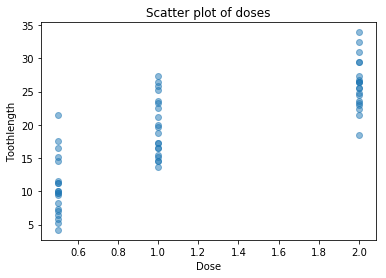

In [24]:
# Plot
plt.scatter(data.dose, data.len, alpha=0.5)
plt.title('Scatter plot of doses')
plt.xlabel('Dose')
plt.ylabel('Toothlength')
plt.show()


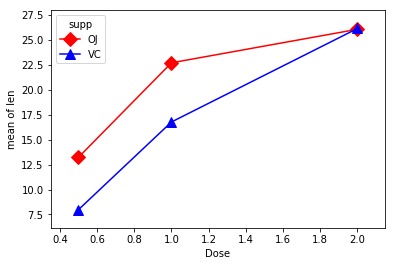

In [38]:
fig = interaction_plot(data.dose.values, data.supp, data.len,
             colors=['red','blue'], markers=['D','^'], ms=10, xlabel='Dose')


### Resources

- https://blog.minitab.com/blog/adventures-in-statistics-2/understanding-analysis-of-variance-anova-and-the-f-testz
- https://www.marsja.se/three-ways-to-carry-out-2-way-anova-with-python/
- https://www.analyticsvidhya.com/blog/2018/01/anova-analysis-of-variance/
- https://newonlinecourses.science.psu.edu/stat500/node/216/
- https://blog.minitab.com/blog/statistics-in-the-field/a-fun-anova3a-does-milk-affect-the-fluffiness-of-pancakes